In [ ]:
!pip install pyspark


#                                                                                                                           **STUDENT PERFORMANCE ANALYSIS**

In [ ]:
import pandas as pd

data = {
    "student_name": ["Asha", "Asha", "Asha", "Rohan", "Rohan", "Rohan", "Meena", "Meena", "Meena"],
    "subject": ["Math", "Science", "English", "Math", "Science", "English", "Math", "Science", "English"],
    "marks": [78, 85, 90, 65, 70, 60, 88, 92, 95],
    "class": ["10A", "10A", "10A", "10A", "10A", "10A", "10A", "10A", "10A"]
}

df = pd.DataFrame(data)
df.to_csv("student_marks.csv", index=False)

df


,student_name,subject,marks,class
0,Asha,Math,78,10A
1,Asha,Science,85,10A
2,Asha,English,90,10A
3,Rohan,Math,65,10A
4,Rohan,Science,70,10A
5,Rohan,English,60,10A
6,Meena,Math,88,10A
7,Meena,Science,92,10A
8,Meena,English,95,10A


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("StudentPerformanceAnalysis").getOrCreate()


In [ ]:
df_spark = spark.read.csv("student_marks.csv", header=True, inferSchema=True)
df_spark.show()


+------------+-------+-----+-----+
|student_name|subject|marks|class|
+------------+-------+-----+-----+
|        Asha|   Math|   78|  10A|
|        Asha|Science|   85|  10A|
|        Asha|English|   90|  10A|
|       Rohan|   Math|   65|  10A|
|       Rohan|Science|   70|  10A|
|       Rohan|English|   60|  10A|
|       Meena|   Math|   88|  10A|
|       Meena|Science|   92|  10A|
|       Meena|English|   95|  10A|
+------------+-------+-----+-----+



In [ ]:
total_marks = df_spark.groupBy("student_name").sum("marks")
total_marks.show()


+------------+----------+
|student_name|sum(marks)|
+------------+----------+
|        Asha|       253|
|       Rohan|       195|
|       Meena|       275|
+------------+----------+



In [ ]:
from pyspark.sql.functions import max

highest = df_spark.groupBy("subject").max("marks")
highest.show()


+-------+----------+
|subject|max(marks)|
+-------+----------+
|Science|        92|
|   Math|        88|
|English|        95|
+-------+----------+



In [ ]:
from pyspark.sql.functions import when, col

pass_fail = df_spark.withColumn("Result", when(col("marks") >= 35, "Pass").otherwise("Fail"))
pass_fail.show()


+------------+-------+-----+-----+------+
|student_name|subject|marks|class|Result|
+------------+-------+-----+-----+------+
|        Asha|   Math|   78|  10A|  Pass|
|        Asha|Science|   85|  10A|  Pass|
|        Asha|English|   90|  10A|  Pass|
|       Rohan|   Math|   65|  10A|  Pass|
|       Rohan|Science|   70|  10A|  Pass|
|       Rohan|English|   60|  10A|  Pass|
|       Meena|   Math|   88|  10A|  Pass|
|       Meena|Science|   92|  10A|  Pass|
|       Meena|English|   95|  10A|  Pass|
+------------+-------+-----+-----+------+



In [ ]:
class_avg = df_spark.groupBy("class").avg("marks")
class_avg.show()


+-----+-----------------+
|class|       avg(marks)|
+-----+-----------------+
|  10A|80.33333333333333|
+-----+-----------------+



In [ ]:

total_marks.write.mode("overwrite").csv("output_total_marks", header=True)


avg_marks.write.mode("overwrite").csv("output_avg_marks", header=True)


highest.write.mode("overwrite").csv("output_highest_scorer", header=True)

print("All output files saved successfully!")


All output files saved successfully!


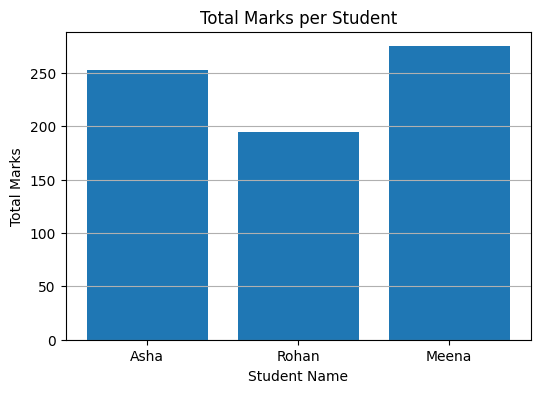

In [ ]:
import matplotlib.pyplot as plt


total_marks_pd = total_marks.toPandas()

plt.figure(figsize=(6,4))
plt.bar(total_marks_pd['student_name'], total_marks_pd['sum(marks)'])
plt.xlabel("Student Name")
plt.ylabel("Total Marks")
plt.title("Total Marks per Student")
plt.grid(axis='y')
plt.show()


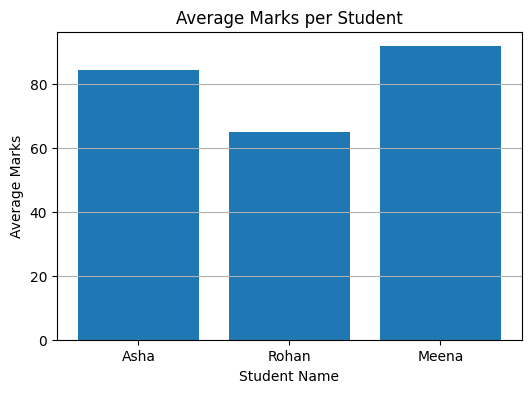

In [ ]:
avg_marks_pd = avg_marks.toPandas()

plt.figure(figsize=(6,4))
plt.bar(avg_marks_pd['student_name'], avg_marks_pd['avg(marks)'])
plt.xlabel("Student Name")
plt.ylabel("Average Marks")
plt.title("Average Marks per Student")
plt.grid(axis='y')
plt.show()


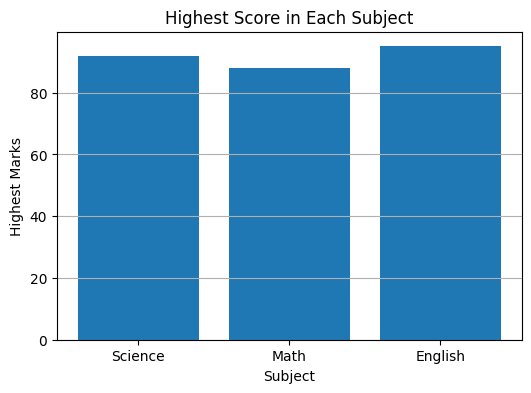

In [ ]:
highest_pd = highest.toPandas()

plt.figure(figsize=(6,4))
plt.bar(highest_pd['subject'], highest_pd['max(marks)'])
plt.xlabel("Subject")
plt.ylabel("Highest Marks")
plt.title("Highest Score in Each Subject")
plt.grid(axis='y')
plt.show()
